In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the train CSV file
train = pd.read_csv("train.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S


In [5]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#check for any other unusable values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


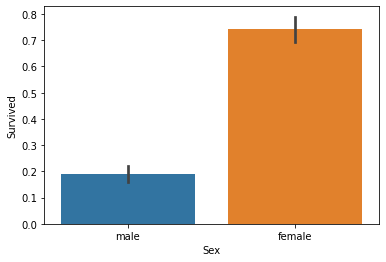

In [7]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


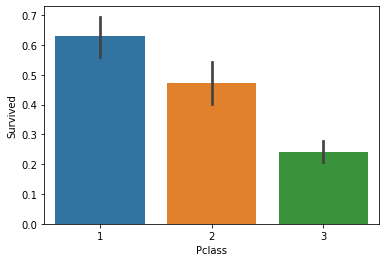

In [8]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


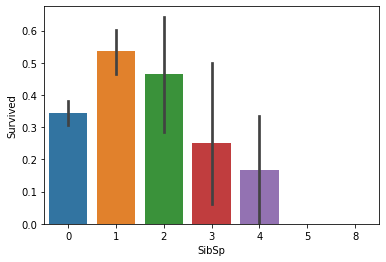

In [9]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

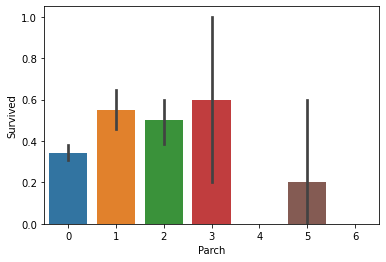

In [10]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

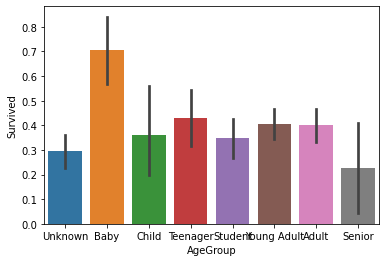

In [11]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


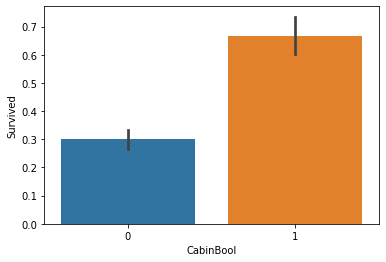

In [12]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

In [13]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)

In [14]:
#we'll start off by dropping the Ticket feature since not a lot more useful information can be extracted from it.
train = train.drop(['Ticket'], axis = 1)

In [15]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [16]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [17]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)

In [18]:
train = train.fillna({"AgeGroup": "5"})

In [19]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)

In [20]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,0,1,0,7.2500,S,4.0,0
1,2,1,1,1,1,0,71.2833,C,6.0,1
2,3,1,3,1,0,0,7.9250,S,5.0,0
3,4,1,1,1,1,0,53.1000,S,5.0,1
4,5,0,3,0,0,0,8.0500,S,5.0,0


In [21]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,0,1,0,7.2500,1,4.0,0
1,2,1,1,1,1,0,71.2833,2,6.0,1
2,3,1,3,1,0,0,7.9250,1,5.0,0
3,4,1,1,1,1,0,53.1000,1,5.0,1
4,5,0,3,0,0,0,8.0500,1,5.0,0


In [22]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,0,1,0,7.2500,1,4.0,0
1,2,1,1,1,1,0,71.2833,2,6.0,1
2,3,1,3,1,0,0,7.9250,1,5.0,0
3,4,1,1,1,1,0,53.1000,1,5.0,1
4,5,0,3,0,0,0,8.0500,1,5.0,0


In [23]:
train.shape

(891, 10)

In [24]:
train = train.fillna({"AgeGroup": "5"})

In [25]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val, = train_test_split(predictors, target, test_size = 0.22,random_state = 0)

In [26]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


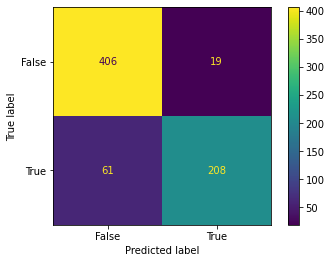

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = gbk.predict(x_train)
z = confusion_matrix(y_train,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z, display_labels = [False, True])

cm_display.plot()
plt.show()

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

86.29


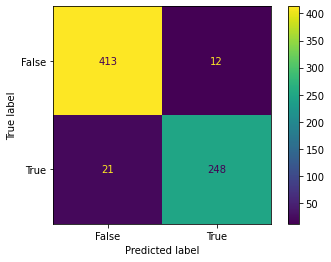

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = randomforest.predict(x_train)
z = confusion_matrix(y_train,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z, display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
from keras import Sequential
from keras.layers import Dense

x = np.asarray(x_train).astype(np.float32)
y = np.asarray(y_train).astype(np.float32)

#NEURAL NETWORK

model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model on the dataset
model.fit(x, y, epochs=150, batch_size=25)

#Evaluate the model
_,accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()


Epoch 1/150
28/28 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5908
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6124
Epoch 3/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6124
Epoch 4/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6124
Epoch 5/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6124
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6124
Epoch 7/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6124
Epoch 8/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6124
Epoch 9/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6124
Epoch 10/150
28/28 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6124
Epoch 11/

In [ ]:
#For the summary, I used the gradient boosting clasifier algorithim and the random forest algorithm. In building the algorithm,
#first, I gathered the needed datasets that will be used in the algorithm. I looked for datasets related to the problem which is 
#the titanic database. After getting the dataset that will be used, I analyzed the data to help me identify my approach in setting 
#and cleaning my data. After cleaning the data, I chose the model/s that I used and the proceeded in training the models. I used 78/22
#split for my train and test data. after finding the accuracy of the models, I furter evaluated my model/s by plotting a confusion matrix
#so that I can visualize the data to be cleaned after running the model. For the neural network, I used sequential model, with 5 dense layers, 
#using the binary cross entropy loss fucntion and the adam optimizer.
'
#For comparison, the gradient boosting classifier at first had the larger accuracy than the random forest. but after adjusting some variables,
#it turned out that random forest is more accurate than the gradinet boosing classifier. One thing that I have noticed is that random forest
#model have different outputs in accuracy everytime that I run the program, while the gradient boosting classifier had a fixed accuracy, so 
#there are times that gradient boosting classifier had the larger accuracy than the random forest model. For the neural network, the model is
#in the middle in terms of the accuracy.

#For the analysis, as I read the data, it appeared that majority of the survivors are female with 74.20% of the total data. Majority of the 
#suvivors are from the first class. Another thing that surprised me is that those who have lesser siblings on the ship has more chance in surviving
#than those who have more. In contrary, those who have more parents or children on the ship survived in the crash. Lastly, more in the age group
#of "baby" survived in the incident.

#in conclusion. it is more likely for Female babies with her parents in first class with no sibling/s to survive the titanic incident. For the
#models, using the random forest model will more likely to present accurate results with 86.29% accuracy at its maximum. 